# Analyse the datasets to find differences

In [104]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

### Reading the 1st CSV file

In [105]:
# Read the 1st CSV file into a DataFrame
data_path = Path("..\Data\diabetes_012_health_indicators_BRFSS2015.csv")

# Create a DataFrame from the CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_26216\78759196.py:2: SyntaxWarning: invalid escape sequence '\D'
  data_path = Path("..\Data\diabetes_012_health_indicators_BRFSS2015.csv")


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [106]:
# Get the shape of the DataFrame
df.shape

(253680, 22)

In [107]:
# Get the data types of the columns
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [108]:
# Get the values of the BMI column
df['BMI'].value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

In [109]:
# Get the max and min of the BMI column
df['BMI'].max(), df['BMI'].min()

(98.0, 12.0)

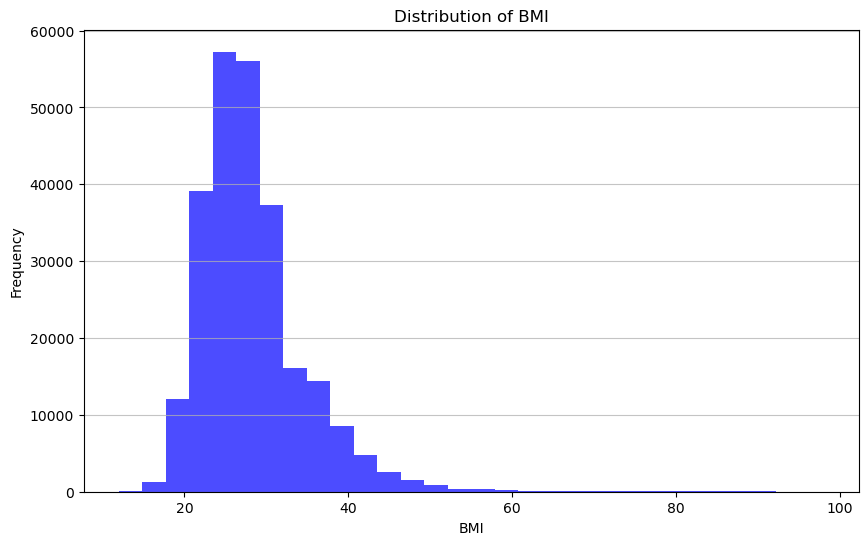

In [110]:
# Plot the distribution of the BMI column
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Correlation coefficient: 0.2243794737583981


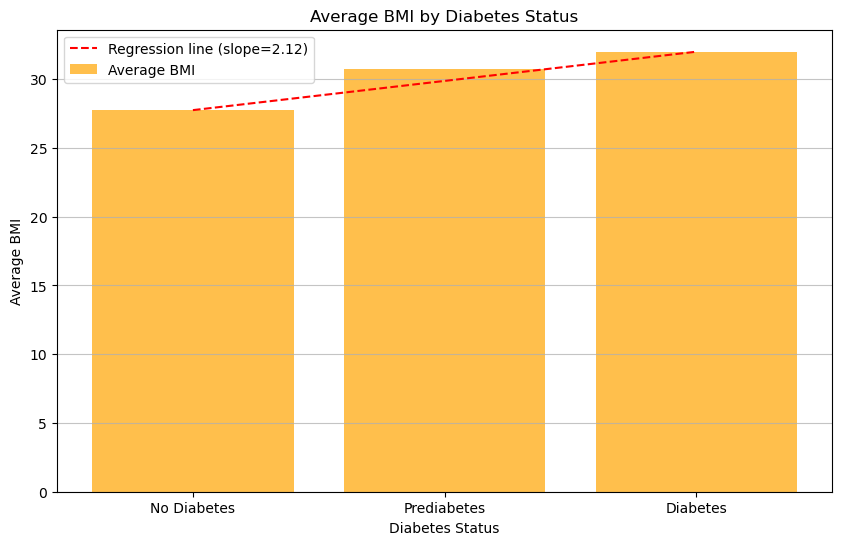

In [111]:
# Get the correlation of the BMI column with the value counts of Diabetes_012
bmi_diabetes_corr = df.groupby('Diabetes_012')['BMI'].mean()
# Calculate the correlation coefficient
correlation = df['BMI'].corr(df['Diabetes_012'])
print(f'Correlation coefficient: {correlation}')

# Fit a linear regression model
slope, intercept = np.polyfit(df['Diabetes_012'], df['BMI'], 1)
regression_line = slope * bmi_diabetes_corr.index + intercept

# Plot the correlation and regression line
plt.figure(figsize=(10, 6))
plt.bar(bmi_diabetes_corr.index, bmi_diabetes_corr.values, color='orange', alpha=0.7, label='Average BMI')
plt.plot(bmi_diabetes_corr.index, regression_line, color='red', linestyle='--', label=f'Regression line (slope={slope:.2f})')
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

The correlation coefficient between the BMI and Diabetes_012 columns is approximately 0.224. In general, a correlation coefficient (r) ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation
- -1 indicates a perfect negative correlation
- 0 indicates no correlation

A correlation coefficient of 0.224 suggests a weak positive correlation between BMI and Diabetes_012. This means that as BMI increases, the likelihood of having diabetes slightly increases, but the relationship is not strong.

In [112]:
# Get the value counts of the cholesterol column
df['HighChol'].value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

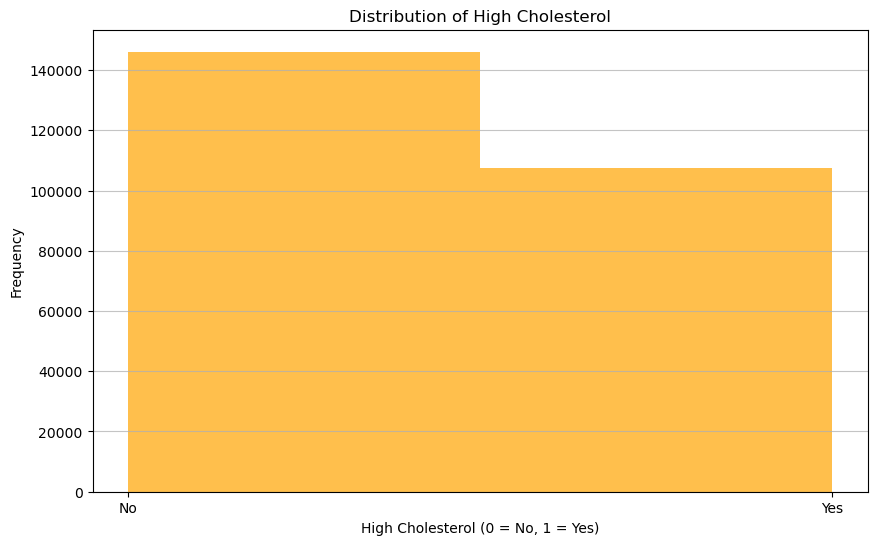

In [113]:
# Plot the distribution of the cholesterol column
plt.figure(figsize=(10, 6))
plt.hist(df['HighChol'], bins=2, color='orange', alpha=0.7)
plt.title('Distribution of High Cholesterol')
plt.xlabel('High Cholesterol (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [114]:
# Get the min and max of the age column
df['Age'].max(), df['Age'].min()

(13.0, 1.0)

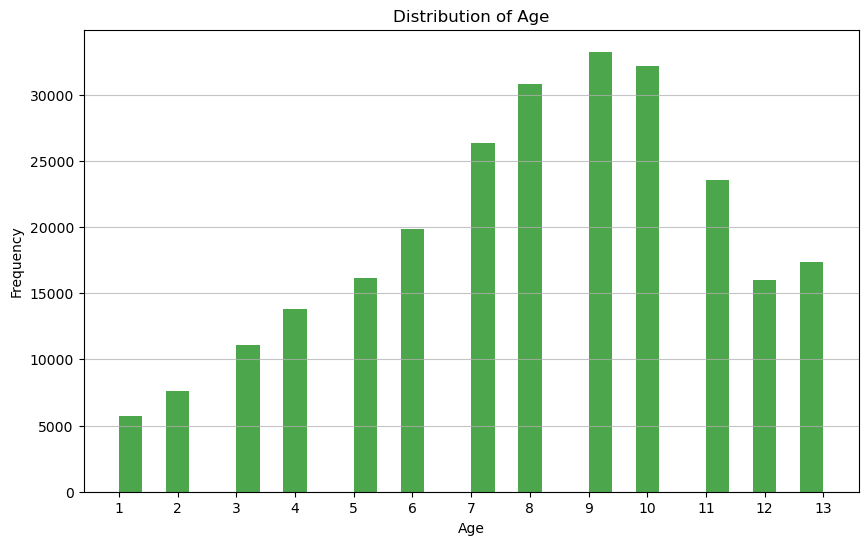

In [115]:
# Plot the distribution of the age column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 1))
plt.show()

### Reading the 2nd CSV file

In [116]:
# Read the 1st CSV file into a DataFrame
data_path = Path("..\Data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Create a DataFrame from the CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_26216\321826979.py:2: SyntaxWarning: invalid escape sequence '\D'
  data_path = Path("..\Data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [117]:
# Get the shape of the DataFrame
df.shape

(70692, 22)

In [118]:
# Get the data types of the columns
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [119]:
# Get the values of the BMI column
df['BMI'].value_counts()

BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64

In [120]:
# Get the max and min of the BMI column
df['BMI'].max(), df['BMI'].min()

(98.0, 12.0)

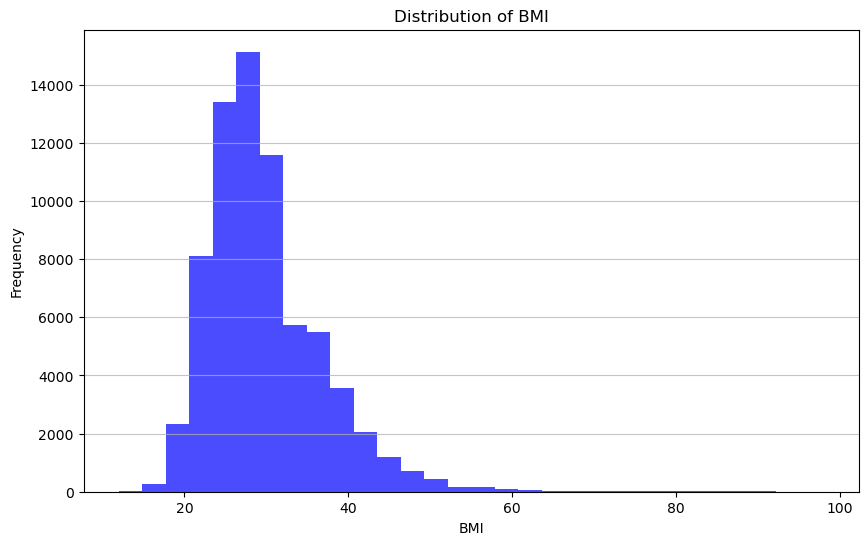

In [121]:
# Plot the distribution of the BMI column
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Correlation coefficient: 0.29337274476104636


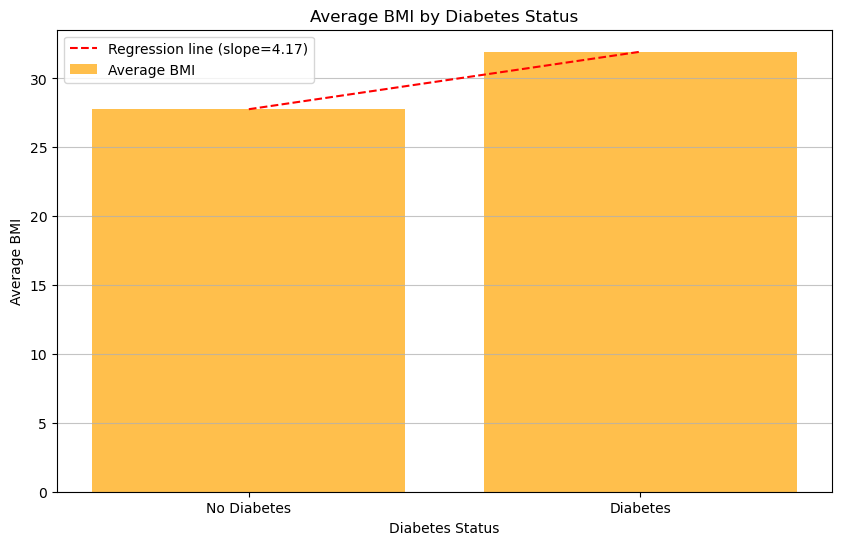

In [122]:
# Get the correlation of the BMI column with the value counts of Diabetes_012
bmi_diabetes_corr = df.groupby('Diabetes_binary')['BMI'].mean()
# Calculate the correlation coefficient
correlation = df['BMI'].corr(df['Diabetes_binary'])
print(f'Correlation coefficient: {correlation}')

# Fit a linear regression model
slope, intercept = np.polyfit(df['Diabetes_binary'], df['BMI'], 1)
regression_line = slope * bmi_diabetes_corr.index + intercept

# Plot the correlation and regression line
plt.figure(figsize=(10, 6))
plt.bar(bmi_diabetes_corr.index, bmi_diabetes_corr.values, color='orange', alpha=0.7, label='Average BMI')
plt.plot(bmi_diabetes_corr.index, regression_line, color='red', linestyle='--', label=f'Regression line (slope={slope:.2f})')
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

The correlation coefficient between the BMI and Diabetes_binary columns is approximately 0.293. In general, a correlation coefficient (r) ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation
- -1 indicates a perfect negative correlation
- 0 indicates no correlation

A correlation coefficient of 0.293 suggests a weak positive correlation between BMI and Diabetes_binary. This means that as BMI increases, the likelihood of having diabetes slightly increases, but the relationship is not strong.

In [123]:
# Get the value counts of the cholesterol column
df['HighChol'].value_counts()

HighChol
1.0    37163
0.0    33529
Name: count, dtype: int64

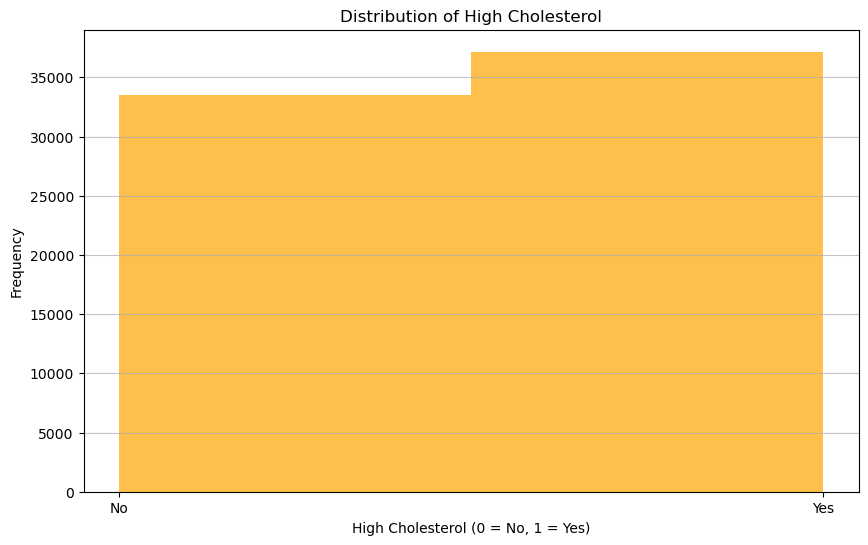

In [124]:
# Plot the distribution of the cholesterol column
plt.figure(figsize=(10, 6))
plt.hist(df['HighChol'], bins=2, color='orange', alpha=0.7)
plt.title('Distribution of High Cholesterol')
plt.xlabel('High Cholesterol (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [125]:
# Get the min and max of the age column
df['Age'].max(), df['Age'].min()

(13.0, 1.0)

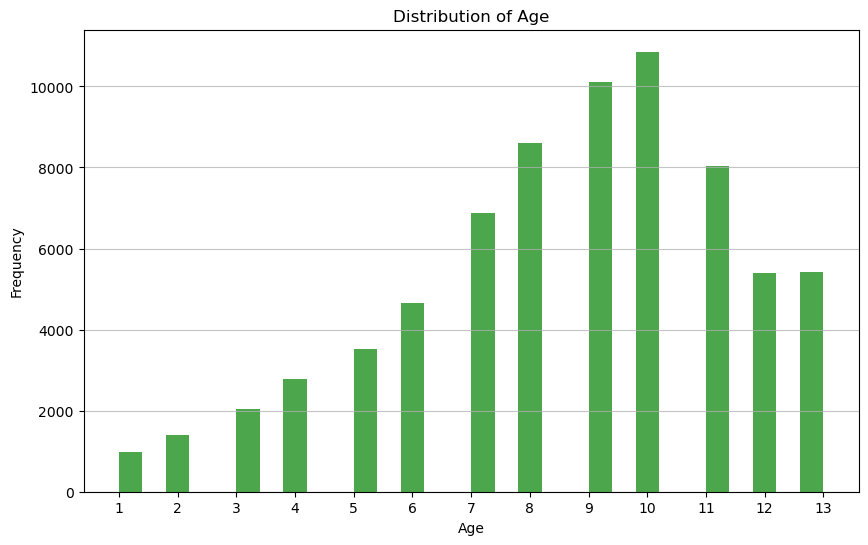

In [126]:
# Plot the distribution of the age column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 1))
plt.show()

### Reading the 3rd CSV file

In [127]:
# Read the 1st CSV file into a DataFrame
data_path = Path("..\Data\diabetes_binary_health_indicators_BRFSS2015.csv")

# Create a DataFrame from the CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_26216\556499701.py:2: SyntaxWarning: invalid escape sequence '\D'
  data_path = Path("..\Data\diabetes_binary_health_indicators_BRFSS2015.csv")


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [128]:
# Get the shape of the DataFrame
df.shape

(253680, 22)

In [129]:
# Get the data types of the columns
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [130]:
# Get the values of the BMI column
df['BMI'].value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

In [131]:
# Get the max and min of the BMI column
df['BMI'].max(), df['BMI'].min()

(98.0, 12.0)

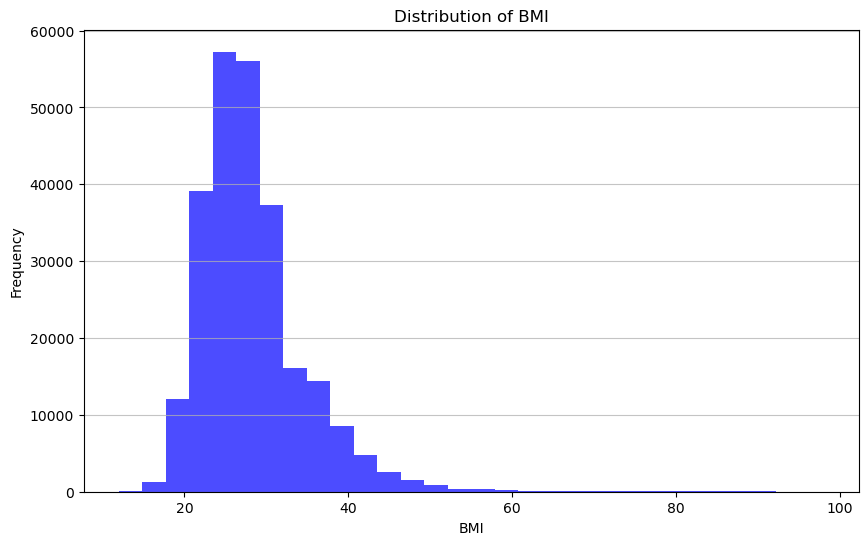

In [132]:
# Plot the distribution of the BMI column
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Correlation coefficient: 0.21684306020311908


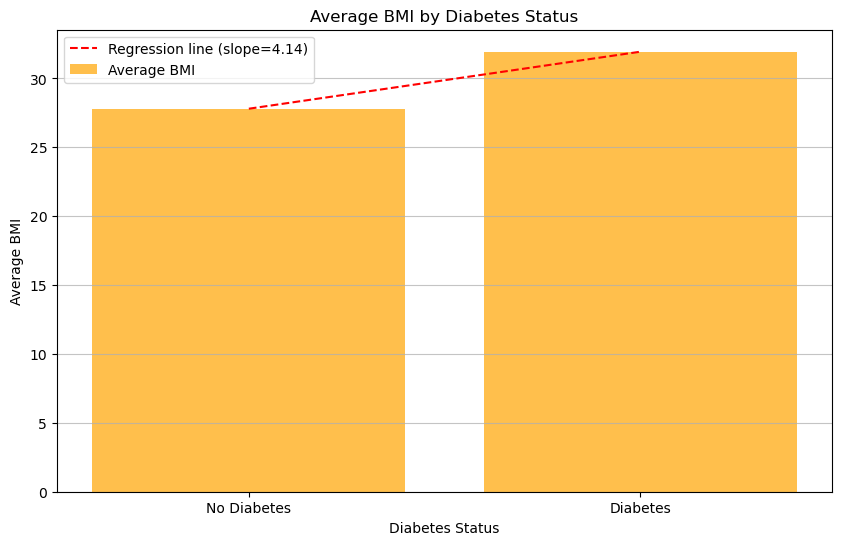

In [133]:
# Get the correlation of the BMI column with the value counts of Diabetes_012
bmi_diabetes_corr = df.groupby('Diabetes_binary')['BMI'].mean()
# Calculate the correlation coefficient
correlation = df['BMI'].corr(df['Diabetes_binary'])
print(f'Correlation coefficient: {correlation}')

# Fit a linear regression model
slope, intercept = np.polyfit(df['Diabetes_binary'], df['BMI'], 1)
regression_line = slope * bmi_diabetes_corr.index + intercept

# Plot the correlation and regression line
plt.figure(figsize=(10, 6))
plt.bar(bmi_diabetes_corr.index, bmi_diabetes_corr.values, color='orange', alpha=0.7, label='Average BMI')
plt.plot(bmi_diabetes_corr.index, regression_line, color='red', linestyle='--', label=f'Regression line (slope={slope:.2f})')
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

The correlation coefficient between the BMI and Diabetes_binary columns is approximately 0.2168. In general, a correlation coefficient (r) ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation
- -1 indicates a perfect negative correlation
- 0 indicates no correlation

A correlation coefficient of 0.2168 suggests a weak positive correlation between BMI and Diabetes_binary. This means that as BMI increases, the likelihood of having diabetes slightly increases, but the relationship is not strong.

In [134]:
# Get the value counts of the cholesterol column
df['HighChol'].value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

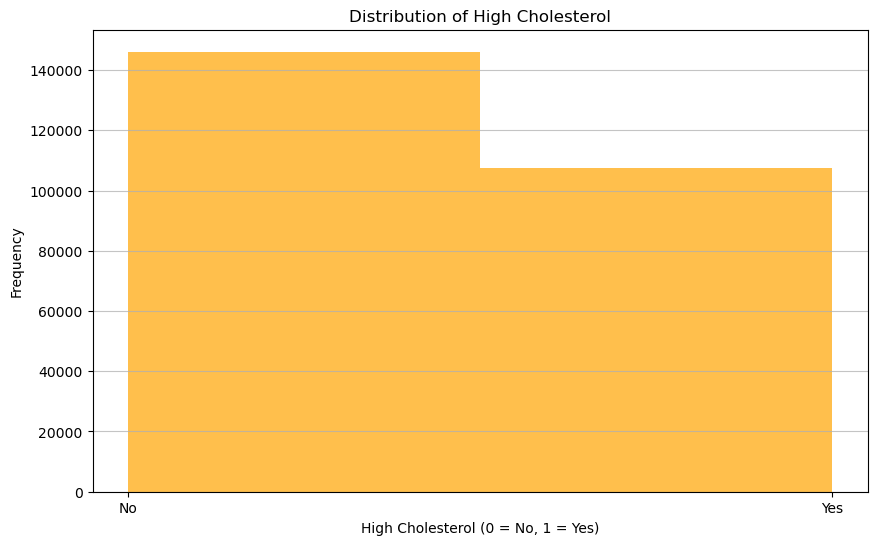

In [135]:
# Plot the distribution of the cholesterol column
plt.figure(figsize=(10, 6))
plt.hist(df['HighChol'], bins=2, color='orange', alpha=0.7)
plt.title('Distribution of High Cholesterol')
plt.xlabel('High Cholesterol (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [136]:
# Get the min and max of the age column
df['Age'].max(), df['Age'].min()

(13.0, 1.0)

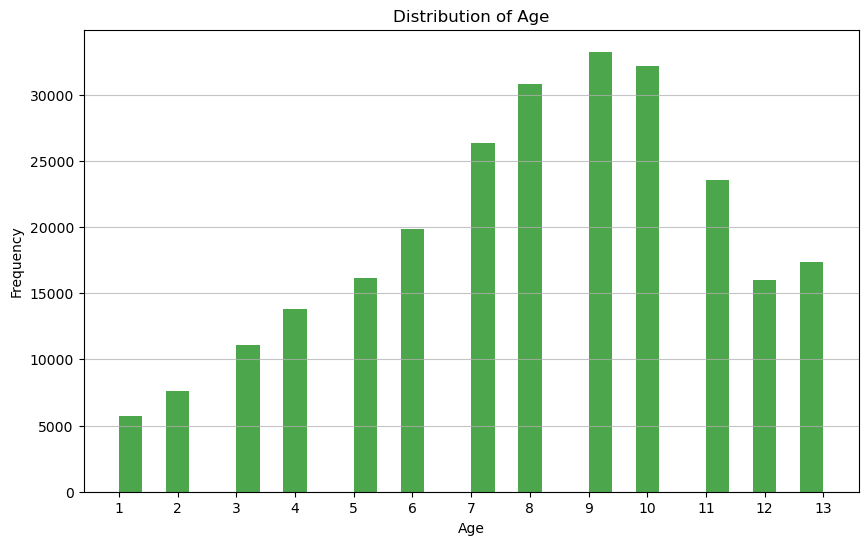

In [137]:
# Plot the distribution of the age column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 1))
plt.show()

### Analysis of Differences Between CSV Files

Based on the research and analysis conducted in the previous cells, we can summarize the differences between the CSV files as follows:

1. **Correlation Between BMI and Diabetes Status**:
    - **First CSV File**: The correlation coefficient between BMI and Diabetes_012 is approximately 0.224, indicating a weak positive correlation.
    - **Second CSV File**: The correlation coefficient between BMI and Diabetes_binary is approximately 0.293, suggesting a slightly stronger weak positive correlation compared to the first file.
    - **Third CSV File**: The correlation coefficient between BMI and Diabetes_binary is approximately 0.2168, which is similar to the first file and indicates a weak positive correlation.

2. **Distribution of BMI**:
    - The distribution of BMI values is plotted for each CSV file, showing the frequency of different BMI values. The histograms indicate that the BMI distribution is similar across all three files, with most values concentrated around the mean.

3. **Average BMI by Diabetes Status**:
    - **First CSV File**: The average BMI for individuals with no diabetes, prediabetes, and diabetes are calculated and plotted. The regression line shows a positive slope, indicating that BMI increases with diabetes status.
    - **Second CSV File**: The average BMI for individuals with no diabetes and diabetes are calculated and plotted. The regression line also shows a positive slope, similar to the first file.
    - **Third CSV File**: The average BMI for individuals with no diabetes and diabetes are calculated and plotted. The regression line is consistent with the previous files, showing a positive slope.

4. **Cholesterol Levels**:
    - The distribution of high cholesterol levels is plotted for each CSV file. The histograms show the frequency of individuals with and without high cholesterol, indicating that the distribution is similar across all files.

5. **Age Distribution**:
    - The distribution of age values is plotted for each CSV file. The histograms show the frequency of different age values, indicating that the age distribution is consistent across all files.

In summary, the analysis reveals that the correlation between BMI and diabetes status is weakly positive across all three CSV files. The distributions of BMI, high cholesterol levels, and age are similar across the datasets. The average BMI increases with diabetes status in all files, as indicated by the positive slopes of the regression lines.

I've also found that the first file contains not include binary data for Diabetes_012, but ternary data (0, 1, 2), indicating no diabetes, prediabetes, and diabetes respectively.
The second and third files do include binary data for diabetes status (0 for no diabetes and 1 for diabetes), which makes them more straightforward for binary classification tasks.